In [1]:
import numpy as np 
import pandas as pd


from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression 


In [2]:
data = pd.read_csv('../input/marvel-vs-dc/db.csv' , encoding = 'latin-1', index_col = 0)

In [3]:
data.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 39
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Original Title       39 non-null     object 
 1   Company              39 non-null     object 
 2   Rate                 39 non-null     float64
 3   Metascore            39 non-null     int64  
 4   Minutes              39 non-null     object 
 5   Release              39 non-null     int64  
 6   Budget               39 non-null     object 
 7   Opening Weekend USA  39 non-null     int64  
 8   Gross USA            39 non-null     int64  
 9   Gross Worldwide      39 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.4+ KB


In [5]:
data.describe()

,Rate,Metascore,Release,Opening Weekend USA,Gross USA,Gross Worldwide
count,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01
mean,7.202564,63.666667,2013.794872,1.151098e+08,3.232659e+08,8.275727e+08
std,1.074706,13.860837,4.286942,6.866708e+07,1.807086e+08,5.332318e+08
min,3.300000,27.000000,2004.000000,5.379365e+06,1.054712e+07,1.090331e+07
25%,6.900000,56.500000,2011.000000,6.539093e+07,2.032217e+08,4.843193e+08
50%,7.300000,67.000000,2015.000000,9.620234e+07,3.186041e+08,7.468469e+08
75%,7.850000,72.500000,2017.000000,1.559225e+08,4.085492e+08,1.104658e+09
max,9.000000,88.000000,2019.000000,3.571150e+08,8.583730e+08,2.797801e+09


In [6]:
# preprocessing 

data.drop('Original Title' , axis = 1 , inplace=True)

In [7]:
data.head()

,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
1,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
2,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
3,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
4,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
5,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


In [8]:
y = data['Company']
X = data.drop('Company' , axis = 1)

In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,0.657438,1.120695,-0.321134,-1.369420,-0.693665,-0.243300,-0.026135,-0.460161
1,-0.473742,-0.194904,-1.090165,-1.369420,-0.536380,-0.880714,-1.056522,-1.071804
2,-0.190947,-0.487259,-0.430995,-0.896789,0.250042,0.191982,-0.060729,-0.386889
3,-0.190947,-0.487259,-0.925372,-0.660473,-0.536380,-0.728617,-0.797387,-0.718619
4,-0.285212,0.170541,-0.430995,-0.660473,-0.693665,-0.738426,-0.821920,-0.868247
5,0.751703,0.389807,0.612689,-0.424157,0.564611,1.362165,1.682349,1.313268
6,-0.002417,-0.121815,-0.101411,-0.187841,0.250042,0.870964,0.480713,0.735704
7,-0.285212,-0.706525,-1.090165,-0.187841,-0.221811,-0.433336,-0.655376,-0.347277
8,0.468908,0.462896,0.228174,0.048475,-0.221811,-0.296337,-0.355984,-0.214973
9,0.751703,0.901429,-0.595788,0.048475,-0.221811,-0.306707,0.055560,-0.104106


In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.7)

In [14]:
# training 
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [15]:
print(f"Model accuracy : {model.score(X_test , y_test)}")

Model accuracy : 0.8333333333333334


In [16]:
data.corr()

,Rate,Metascore,Release,Opening Weekend USA,Gross USA,Gross Worldwide
Rate,1.000000,0.786901,0.331977,0.521689,0.609582,0.565348
Metascore,0.786901,1.000000,0.232213,0.425888,0.575244,0.450119
Release,0.331977,0.232213,1.000000,0.433480,0.449439,0.552735
Opening Weekend USA,0.521689,0.425888,0.433480,1.000000,0.935783,0.933075
Gross USA,0.609582,0.575244,0.449439,0.935783,1.000000,0.939677
Gross Worldwide,0.565348,0.450119,0.552735,0.933075,0.939677,1.000000


In [17]:
data 

,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
1,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
2,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
3,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
4,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
5,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
6,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
7,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
8,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
9,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
10,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [18]:
data['Company'] = encoder.fit_transform(data['Company'])

In [19]:
data

,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
1,1,7.9,79,126,2008,140000000,98618668,318604126,585366247
2,1,6.7,61,112,2008,150000000,55414050,134806913,263427551
3,1,7.0,57,124,2010,200000000,128122480,312433331,623933331
4,1,7.0,57,115,2011,150000000,65723338,181030624,449326618
5,1,6.9,66,124,2011,140000000,65058524,176654505,370569774
6,1,8.0,69,143,2012,220000000,207438708,623357910,1518812988
7,1,7.2,62,130,2013,200000000,174144585,409013994,1214811252
8,1,6.9,54,112,2013,170000000,85737841,206362140,644783140
9,1,7.7,70,136,2014,170000000,95023721,259766572,714421503
10,1,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

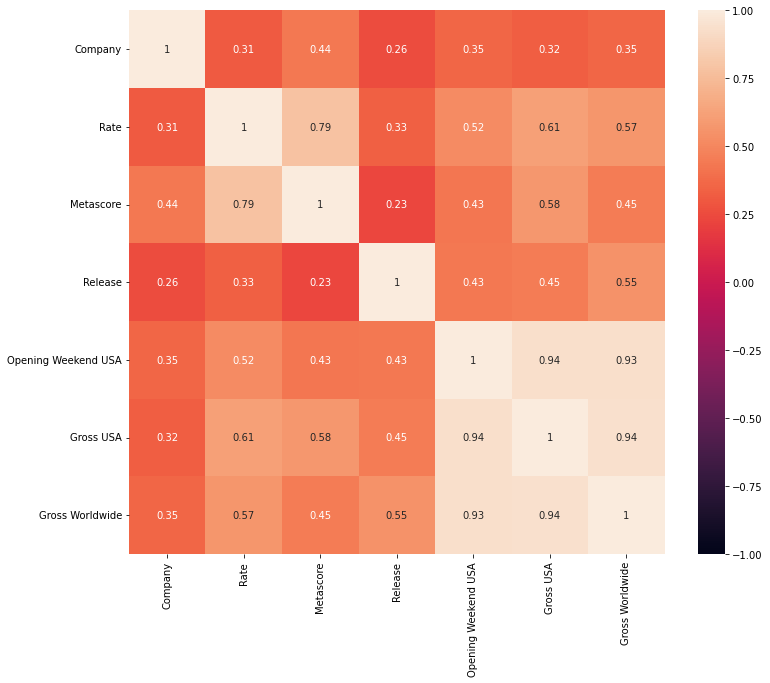

In [21]:
corr = data.corr()
plt.figure(figsize = (12 , 10))
sns.heatmap(corr , annot = True , vmax = 1 , vmin = -1)
plt.show()